
#  «Анализ данных об оптовых продажах аудиотехники»

В ходе проекта необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут принять верные тактические решения для компании. 

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  



In [18]:
import pandas as pd


In [19]:
import os

In [20]:
data_folder = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/'

In [4]:
target_files = ['orders.csv, order_status.csv, products.csv']

In [21]:
data_files = []
for path, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/'):
    for file in files:
        data_file = os.path.join(path, file)
        if file.endswith('.csv'):
            # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            data_file = os.path.join(path, file)
            # Добавляем получившийся путь в список
            data_files.append(data_file)

In [22]:
orders_df_list = []

In [23]:
order_status_df_list = []

In [24]:
products_df_list = []

In [25]:
for file in data_files:
    df = pd.read_csv(file)
    if 'orders.csv' in file:
        df['manager'] = file.split('/')[-2]
        df['date'] = file.split('/')[-3]
        orders_df_list.append(df)
    elif 'order_status.csv' in file:
        order_status_df_list.append(df)
    elif 'products.csv' in file:
        df['category'] = file.split('/')[-2]
        products_df_list.append(df)
   

In [26]:
df_orders = pd.concat(orders_df_list, ignore_index=True)


In [17]:
df_orders.shape

(4603, 5)

In [50]:
df_orders.to_csv('df_orders', index=False)

In [27]:
df_order_status = pd.concat(order_status_df_list, ignore_index=True)


In [16]:
df_order_status.shape

(346, 3)

In [12]:
df_order_status.to_csv('df_order_status', index=False)

In [47]:
df_order_status.head()

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled


In [28]:
df_products = pd.concat(products_df_list, ignore_index=True)

In [52]:
df_products.to_csv('df_products', index=False)

In [18]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-zhanna-timofeva-pw-175e9/shared/homeworks/python_ds_miniprojects/final_project/data/products/Са

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитаем количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

In [29]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format= '%Y-%m-%d')

In [85]:
df_orders.groupby('date',as_index=False).agg({'order_id' : 'nunique'}).sort_values(by='order_id', ascending=False)

,date,order_id
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


In [56]:
df_orders.head()

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10


In [54]:
df_products.head()

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер


In [20]:
df_order_status.head()

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled


In [79]:
orders_for_4 = orders_for_4.rename(columns={'order_id' : 'orders'})

## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt



In [88]:
df_orders['weekday'] = df_orders.date.dt.day_name()

In [89]:
df_orders.head()

,order_id,product_id,quantity,manager,date,weekday
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,Sunday
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,Sunday
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,Sunday
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,Sunday
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,Sunday


In [101]:
 df_orders.groupby('weekday',as_index=False) \
    .agg({'order_id' : 'nunique'}) \


,weekday,order_id
0,Friday,75
1,Monday,43
2,Saturday,10
3,Sunday,10
4,Thursday,73
5,Tuesday,65
6,Wednesday,70


In [106]:
df_orders.groupby(['date', 'weekday'],as_index=False) \
    .agg({'order_id' : 'nunique'}) \

,date,weekday,order_id
0,2024-03-01,Friday,22
1,2024-03-02,Saturday,2
2,2024-03-03,Sunday,1
3,2024-03-04,Monday,10
4,2024-03-05,Tuesday,18
5,2024-03-06,Wednesday,14
6,2024-03-07,Thursday,14
7,2024-03-08,Friday,1
8,2024-03-09,Saturday,1
9,2024-03-10,Sunday,3


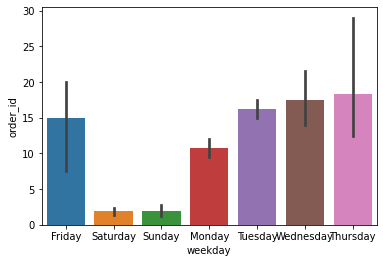

In [105]:
sns.barplot(data=df_orders_group, x='weekday', y='order_id')

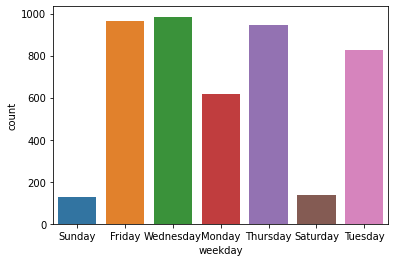

In [98]:

sns.countplot(data=df_orders, x='weekday')

In [ ]:
# Да, по выходным почти нет заказов


## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

In [ ]:
# 2024-03-08, это праздничный день, в который было мало заказов

## Шаг 6

К вам пришел руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`.  

In [31]:
orders_status = df_order_status.merge(df_orders, on='order_id')

In [116]:
orders_status.head()

,order_id,client_id,status,product_id,quantity,manager,date
0,QPLK-54839036,52,confirmed,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,52,confirmed,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,52,confirmed,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,52,confirmed,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,52,confirmed,1302,5,Владимир Ударников,2024-03-10


In [117]:
orders_status.to_csv('orders_status', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

In [32]:
orders_status[['order_id', 'status']].drop_duplicates()


,order_id,status
0,QPLK-54839036,confirmed
8,MAQJ-95867467,canceled
20,KHLF-51759445,confirmed
35,DALF-47566548,confirmed
55,BZHU-92977894,canceled
...,...,...
4539,SOCT-63427141,confirmed
4558,HLDH-41146746,confirmed
4571,IZFC-94335845,confirmed
4580,CUDB-19668701,confirmed


In [130]:
round((37 / (309+37)), 2)

0.11

In [131]:
orders_status.dtypes

order_id              object
client_id              int64
status                object
product_id             int64
quantity               int64
manager               object
date          datetime64[ns]
dtype: object

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

In [22]:
orders_status_pivot = orders_status.groupby(['date', 'status'], as_index=False) \
    .agg({'order_id' : 'nunique'}) \
    .rename(columns={'order_id' : 'orders'}) \
    .pivot(index='date', columns='status', values='orders') \
    .fillna(0) \
    .reset_index() 


In [149]:
orders_status_pivot.head()

status,date,canceled,confirmed
0,2024-03-01,2,20
1,2024-03-02,0,2
2,2024-03-03,0,1
3,2024-03-04,0,10
4,2024-03-05,0,18


In [146]:
orders_status_pivot.canceled = orders_status_pivot.canceled.astype(int)

In [148]:
orders_status_pivot.confirmed = orders_status_pivot.confirmed.astype(int)

In [150]:
orders_status_pivot.query('confirmed == 0')

status,date,canceled,confirmed
8,2024-03-09,1,0


In [154]:
orders_status.head()

,order_id,client_id,status,product_id,quantity,manager,date
0,QPLK-54839036,52,confirmed,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,52,confirmed,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,52,confirmed,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,52,confirmed,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,52,confirmed,1302,5,Владимир Ударников,2024-03-10


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

In [159]:
orders_status9 = orders_status.groupby(['date', 'status'], as_index=False).agg({'order_id' : 'nunique'}).rename(columns={'order_id' : 'orders'})

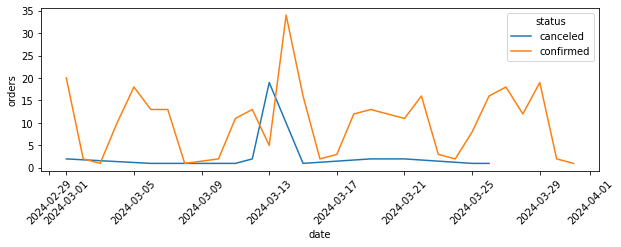

In [162]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)
sns.lineplot(data=orders_status9, x='date', y='orders', hue='status')


In [ ]:
# В день с наибольшим числом заказов было много успешно оформленных заказов
# В день, предшествующий дню с наибольшим числом заказов, было много отмен

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

In [193]:
orders_status_cans = orders_status.query('status == "canceled" and date == "2024-03-13"') \
    .groupby('order_id') \
    .agg({'product_id' : 'nunique', 'quantity' : 'sum', 'manager' : 'max', 'client_id' : 'max'}) \
    .reset_index() \
    .rename(columns={'index' : 'char'})


In [34]:
orders_status_cans

,order_id,product_id,quantity,manager,client_id
0,AFIH-00611801,11,192,Алексей Саксофонов,43
1,BBFJ-27674101,14,294,Ксения Балалайкина,73
2,CLBQ-63032648,13,205,Виктор Тромбонов,60
3,CYJY-07359557,13,316,Екатерина Тарелкина,56
4,GHGB-88045656,4,42,Ксения Балалайкина,7
5,JEIF-69283221,15,207,Виктор Тромбонов,94
6,JQQO-28609300,15,252,Виктор Тромбонов,93
7,KJJS-03491897,18,399,Алексей Саксофонов,66
8,MIGZ-68487439,17,325,Алексей Саксофонов,51
9,NBIO-35476164,14,319,Виктор Тромбонов,95


In [194]:
orders_status_conmf = orders_status.query('status == "confirmed" and date == "2024-03-14"') \
    .groupby('order_id') \
    .agg({'product_id' : 'nunique', 'quantity' : 'sum', 'manager' : 'max', 'client_id' : 'max'}) \
    .reset_index() \
    .rename(columns={'index' : 'char'})

In [60]:
orders_status_cans

,order_id,status,product_id,quantity,manager,client_id
0,AFIH-00611801,canceled,11,192,Алексей Саксофонов,43
1,BBFJ-27674101,canceled,14,294,Ксения Балалайкина,73
2,CLBQ-63032648,canceled,13,205,Виктор Тромбонов,60
3,CYJY-07359557,canceled,13,316,Екатерина Тарелкина,56
4,GHGB-88045656,canceled,4,42,Ксения Балалайкина,7
5,JEIF-69283221,canceled,15,207,Виктор Тромбонов,94
6,JQQO-28609300,canceled,15,252,Виктор Тромбонов,93
7,KJJS-03491897,canceled,18,399,Алексей Саксофонов,66
8,MIGZ-68487439,canceled,17,325,Алексей Саксофонов,51
9,NBIO-35476164,canceled,14,319,Виктор Тромбонов,95


In [25]:
orders_status_conmf.shape

(34, 5)

In [77]:
orders_status_cans.shape

(19, 5)

In [82]:
round(19 / 34, 2)

0.56

In [36]:
our_orders_status = orders_status_conmf.merge(orders_status_cans, on=['manager', 'client_id', 'quantity', 'product_id'], suffixes=('_canceled', '_confirmed'))

In [80]:
our_orders_status

,order_id_canceled,product_id,quantity,manager,client_id,order_id_confirmed
0,AUZX-12706022,19,369,Екатерина Тарелкина,83,RSBH-94158604
1,BCMM-97072924,17,325,Алексей Саксофонов,51,MIGZ-68487439
2,EPBF-14743479,15,207,Виктор Тромбонов,94,JEIF-69283221
3,FDEB-71487438,11,192,Алексей Саксофонов,43,AFIH-00611801
4,FTPV-77865209,16,283,Маргарита Камертонова,26,UUZR-48309816
5,GRCH-73394464,18,399,Алексей Саксофонов,66,KJJS-03491897
6,GYTK-45256974,12,260,Ксения Балалайкина,75,NLSJ-24436750
7,HMXC-87726636,14,262,Маргарита Камертонова,68,QYZK-30462944
8,IECD-18739530,13,205,Виктор Тромбонов,60,CLBQ-63032648
9,IMND-92004620,10,188,Владимир Ударников,38,NENO-68279828


In [ ]:
# Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. 
# В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам 
# пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние 



### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

In [51]:
with open('usd_rate.txt', 'r') as file:
    currency = file.readlines()  # Читаем все строки и сохраняем в переменную
# Удаляем символы новой строки из каждой строки
currency = [line.strip() for line in currency]


In [52]:
df_usd_rate = pd.DataFrame(currency, columns=['data'])

In [39]:
df_usd_rate

,data
0,"2024-03-01,90.8423,Доллар США"
1,"2024-03-02,91.3336,Доллар США"
2,"2024-03-03,91.3336,Доллар США"
3,"2024-03-04,91.3336,Доллар США"
4,"2024-03-05,91.3534,Доллар США"
5,"2024-03-06,91.1604,Доллар США"
6,"2024-03-07,90.3412,Доллар США"
7,"2024-03-08,90.7493,Доллар США"
8,"2024-03-09,90.7493,Доллар США"
9,"2024-03-10,90.7493,Доллар США"


In [53]:
df_usd_rate[['date', 'currency_rate', 'nn']] = df_usd_rate['data'].str.split(',', expand=True)

In [54]:
df_usd_rate.drop(columns=['nn'], inplace=True)

In [55]:
df_usd_rate['date'] = pd.to_datetime(df_usd_rate['date'], format='%Y-%m-%d')

In [56]:
df_usd_rate['currency_rate'] = df_usd_rate['currency_rate'].astype(float)

In [57]:
df_usd_rate.dtypes

data                     object
date             datetime64[ns]
currency_rate           float64
dtype: object

In [45]:
df_usd_rate.head()

,data,date,currency_rate
0,"2024-03-01,90.8423,Доллар США",2024-03-01,90.8423
1,"2024-03-02,91.3336,Доллар США",2024-03-02,91.3336
2,"2024-03-03,91.3336,Доллар США",2024-03-03,91.3336
3,"2024-03-04,91.3336,Доллар США",2024-03-04,91.3336
4,"2024-03-05,91.3534,Доллар США",2024-03-05,91.3534


In [58]:
df_usd_rate.currency_rate = df_usd_rate.currency_rate.astype(float)

In [59]:
df_usd_rate.currency_rate.mean().round(2)


91.7

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

In [48]:
df_full.head()



,order_id,client_id,status,product_id,quantity,manager,date,id,name,price,category
0,QPLK-54839036,52,confirmed,489,11,Владимир Ударников,2024-03-10,489,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,20,confirmed,489,10,Алексей Саксофонов,2024-03-12,489,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,24,confirmed,489,18,Алексей Саксофонов,2024-03-19,489,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,52,confirmed,594,6,Владимир Ударников,2024-03-10,594,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,33,confirmed,594,18,Надежда Гармошкина,2024-03-01,594,"JBL, Control 28-1",301.85,Настенная акустика


In [60]:
df_full.date = pd.to_datetime(df_usd_rate['date'], format='%Y-%m-%d')

In [61]:
df_full = orders_status.merge(df_products, left_on='product_id', right_on='id')

In [62]:
df_full = df_full.merge(df_usd_rate, on='date')

In [63]:
df_full.head()

,order_id,client_id,status,product_id,quantity,manager,date,id,name,price,category,data,currency_rate
0,QPLK-54839036,52,confirmed,489,11,Владимир Ударников,2024-03-10,489,"Heco, Ambient 33F",290.74,Настенная акустика,"2024-03-10,90.7493,Доллар США",90.7493
1,QPLK-54839036,52,confirmed,594,6,Владимир Ударников,2024-03-10,594,"JBL, Control 28-1",301.85,Настенная акустика,"2024-03-10,90.7493,Доллар США",90.7493
2,QPLK-54839036,52,confirmed,670,16,Владимир Ударников,2024-03-10,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,"2024-03-10,90.7493,Доллар США",90.7493
3,QPLK-54839036,52,confirmed,469,9,Владимир Ударников,2024-03-10,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,"2024-03-10,90.7493,Доллар США",90.7493
4,QPLK-54839036,52,confirmed,1302,5,Владимир Ударников,2024-03-10,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,"2024-03-10,90.7493,Доллар США",90.7493


In [64]:
df_full['price_rub'] = df_full.price*df_full.currency_rate

In [65]:
df_full['revenue'] = df_full.price_rub*df_full.quantity

In [66]:
df_confirmed = df_full.query('status == "confirmed"')

In [67]:
df_confirmed.revenue.sum()

2038231821.564864

In [61]:
df_confirmed.head()

,order_id,client_id,status,product_id,quantity,manager,date,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,52,confirmed,489,11,Владимир Ударников,2024-03-10,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,52,confirmed,594,6,Владимир Ударников,2024-03-10,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,52,confirmed,670,16,Владимир Ударников,2024-03-10,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,52,confirmed,469,9,Владимир Ударников,2024-03-10,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,52,confirmed,1302,5,Владимир Ударников,2024-03-10,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

In [68]:
df_confirmed_ = df_confirmed.drop_duplicates(subset='order_id')


In [69]:
df_confirmed_.shape

(309, 15)

In [70]:
round(2038231821.564864 / 309, 2)

6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

In [71]:
df_report_by_date = df_confirmed.groupby('date', as_index=False).agg({'order_id' : 'nunique', 'revenue' : 'sum'}) \
    .rename(columns={'order_id' : 'orders'})



In [72]:
df_report_by_date.head()

,date,orders,revenue
0,2024-03-01,20,1.554118e+08
1,2024-03-02,2,1.197167e+07
2,2024-03-03,1,2.548418e+06
3,2024-03-04,10,6.404993e+07
4,2024-03-05,18,8.952724e+07


In [73]:
df_report_by_date = df_report_by_date.assign(average_bill = round(df_report_by_date.revenue / df_report_by_date.orders, 2) )

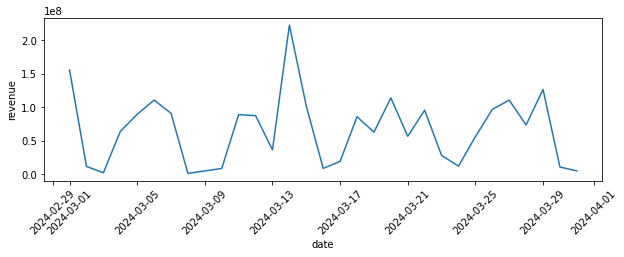

In [74]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)

sns.lineplot(data=df_report_by_date, x='date', y='revenue')

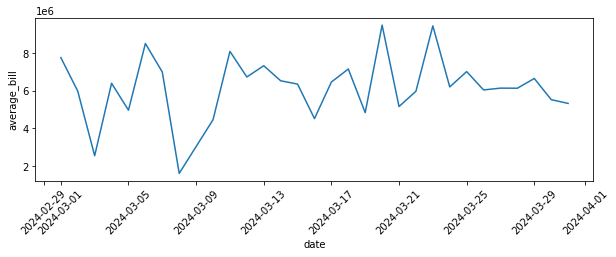

In [75]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)

sns.lineplot(data=df_report_by_date, x='date', y='average_bill')

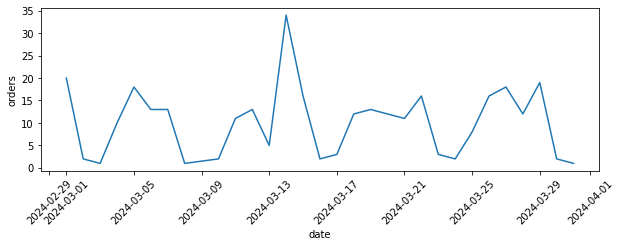

In [97]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)

sns.lineplot(data=df_report_by_date, x='date', y='orders')

In [126]:
df_full.head(15)

,order_id,client_id,status,product_id,quantity,manager,date,id,name,price,category,currency_rate,price_rub,revenue,brand
0,QPLK-54839036,52,confirmed,489,11,Владимир Ударников,2024-03-10,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05,Heco
1,QPLK-54839036,52,confirmed,594,6,Владимир Ударников,2024-03-10,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05,JBL
2,QPLK-54839036,52,confirmed,670,16,Владимир Ударников,2024-03-10,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06,KEF
3,QPLK-54839036,52,confirmed,469,9,Владимир Ударников,2024-03-10,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04,Heco
4,QPLK-54839036,52,confirmed,1302,5,Владимир Ударников,2024-03-10,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04,Rode
5,QPLK-54839036,52,confirmed,1309,5,Владимир Ударников,2024-03-10,1309,"Samsung, HT-J5500W",264.56,Домашний кинотеатр,90.7493,24008.634808,1.200432e+05,Samsung
6,QPLK-54839036,52,confirmed,134,4,Владимир Ударников,2024-03-10,134,"Dali, Rubicon 2 C",3230.71,Активные колонки,90.7493,293184.671003,1.172739e+06,Dali
7,QPLK-54839036,52,confirmed,1659,10,Владимир Ударников,2024-03-10,1659,"Yamaha, YAS-209BL",287.74,Саундбар,90.7493,26112.203582,2.611220e+05,Yamaha
8,MAQJ-95867467,84,canceled,317,16,Екатерина Тарелкина,2024-03-10,317,"Edifier, MP380",83.91,Портативная акустика,90.7493,7614.773763,1.218364e+05,Edifier
9,MAQJ-95867467,84,canceled,1565,12,Екатерина Тарелкина,2024-03-10,1565,"Wharfedale, Diamond 220C",324.24,Центральный канал,90.7493,29424.553032,3.530946e+05,Wharfedale


### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

In [76]:
import re

In [77]:
pattern = re.compile('(\\w+[^,])')

In [78]:
df_full['brand'] = df_full.name.str.extract(pattern)

In [84]:
df_full.brand.nunique()

121

In [85]:
df_full.brand.value_counts()

JBL          683
Heco         494
Yamaha       431
Klipsch      352
Magnat       231
            ... 
Creative       1
Bryston        1
Microsoft      1
TCL            1
Fosi           1
Name: brand, Length: 121, dtype: int64

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

In [91]:
df_full.groupby('brand', as_index=False).agg({'revenue' : 'sum'}).sort_values(by='revenue', ascending=False)


,brand,revenue
46,JBL,3.080112e+08
43,Heco,2.632046e+08
53,Klipsch,2.205107e+08
120,Yamaha,1.798673e+08
49,KEF,1.619835e+08
...,...,...
88,SMSL,3.841799e+04
8,AudioSource,3.388167e+04
40,Fosi,3.129419e+04
18,Bravo,2.405086e+04


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

In [121]:
df_confirmed.head(1)

,order_id,client_id,status,product_id,quantity,manager,date,id,name,price,category,data,currency_rate,price_rub,revenue
0,QPLK-54839036,52,confirmed,489,11,Владимир Ударников,2024-03-10,489,"Heco, Ambient 33F",290.74,Настенная акустика,"2024-03-10,90.7493,Доллар США",90.7493,26384.451482,290228.966302


In [122]:
df_products.head(1)

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes


In [125]:
df_products['is_in_orders'] = df_products.id.isin(products_in_orders).replace({True: 'yes', False: 'no'}) \
    .fillna(0)

In [128]:
df_products.head()

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes


In [129]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [141]:
df_products.head()



,id,name,price,category,is_in_orders,brand
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes,Denon
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes,Denon
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes,Denon
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes,Denon
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes,Denon


In [131]:
df_products['brand'] = df_products.name.str.extract(pattern)

In [142]:
df_products_pivot = df_products.groupby(['brand','is_in_orders'], as_index=False).agg({'id' : 'nunique'}) \
    .rename(columns={'id' : 'products'}) \
    .pivot(index='brand', columns='is_in_orders', values='products') \
    .fillna(0) \
    .reset_index() 


In [143]:
df_products_pivot = df_products_pivot.assign(products_count= df_products_pivot.no + df_products_pivot.yes)

In [149]:
df_products_pivot = df_products_pivot.assign(dolya= round(df_products_pivot.no / df_products_pivot.products_count, 2))

In [150]:
df_products_pivot.head()

is_in_orders,brand,no,yes,products_count,dolya
0,AKG,6.0,5.0,11.0,0.55
1,ART,0.0,1.0,1.0,0.00
2,ASUS,1.0,2.0,3.0,0.33
3,Adam,1.0,0.0,1.0,1.00
4,Amazon,0.0,4.0,4.0,0.00


In [151]:
df_products_pivot.query('products_count > 15 and dolya > 0.5')

is_in_orders,brand,no,yes,products_count,dolya
32,Dali,49.0,18.0,67.0,0.73
60,KEF,54.0,28.0,82.0,0.66
77,Marantz,19.0,3.0,22.0,0.86
94,Pioneer,70.0,33.0,103.0,0.68


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

In [198]:
df_confirmed_final = df_confirmed.groupby('manager', as_index=False) \
    .agg({'revenue' : 'sum', 'order_id' : 'nunique'}) \
    .rename(columns={'order_id': 'orders'}) \
    .sort_values(by='revenue', ascending=False) \

# заказы группируем по менеджеру из дф с подтв. заказами
# считаем выручку для каждого мен. и считаем кол-во заказов
# переименовываем колонку с кол-вом заказов
#сортируем по выручке по убыванию

In [199]:
df_confirmed_final = df_confirmed_final.assign(pers_revenue = round((df_confirmed_final.revenue / df_confirmed_final.revenue.sum()) *100, 2) )

In [200]:
df_confirmed_final = df_confirmed_final.assign(pers_orders = round((df_confirmed_final.orders / df_confirmed_final.orders.sum() *100), 2))

In [177]:
df_confirmed_final.orders.sum()

4083

In [174]:
df_confirmed_final.revenue.sum()

2038231821.5648634

In [162]:
df_confirmed.isna().sum()

order_id         0
client_id        0
status           0
product_id       0
quantity         0
manager          0
date             0
id               0
name             0
price            0
category         0
data             0
currency_rate    0
price_rub        0
revenue          0
dtype: int64

In [182]:
df_confirmed_final.head()

,manager,revenue,orders,pers_revenue,pers_orders
9,Маргарита Камертонова,3.473886e+08,678,17.04,16.61
4,Виктор Тромбонов,3.188999e+08,641,15.65,15.70
8,Максим Барабанов,2.401478e+08,502,11.78,12.29
5,Владимир Ударников,2.084865e+08,423,10.23,10.36
0,Алексей Саксофонов,1.953435e+08,391,9.58,9.58


In [164]:
df_confirmed.dtypes

order_id                 object
client_id                 int64
status                   object
product_id                int64
quantity                  int64
manager                  object
date             datetime64[ns]
id                        int64
name                     object
price                   float64
category                 object
data                     object
currency_rate           float64
price_rub               float64
revenue                 float64
dtype: object

In [165]:
df_confirmed.duplicated().sum()



0

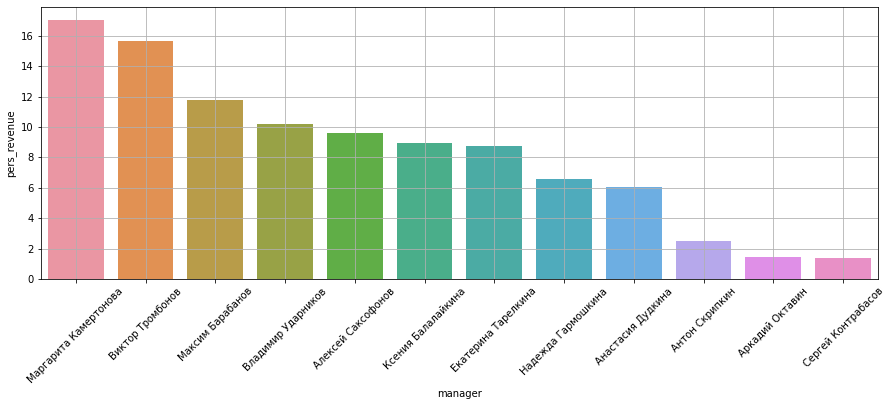

In [201]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)

sns.barplot(data=df_confirmed_final, x='manager', y='pers_revenue')
plt.grid()

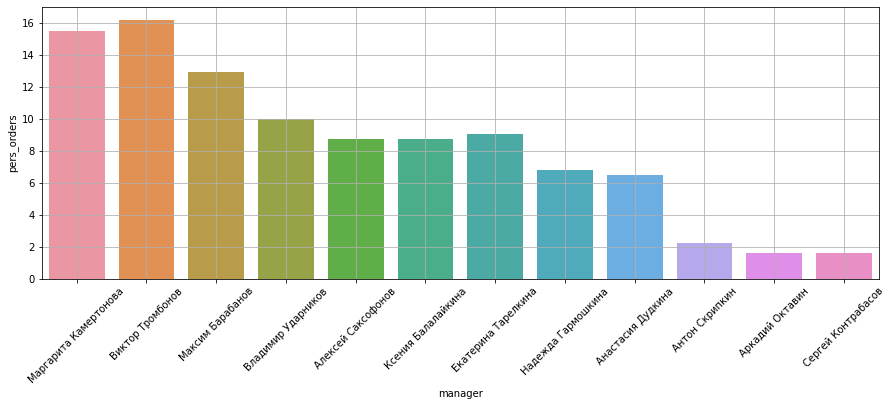

In [202]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)

sns.barplot(data=df_confirmed_final, x='manager', y='pers_orders')

plt.grid()

In [192]:
df_confirmed_final

,manager,revenue,orders,pers_revenue,pers_orders
9,Маргарита Камертонова,3.473886e+08,678,17.04,16.61
4,Виктор Тромбонов,3.188999e+08,641,15.65,15.70
8,Максим Барабанов,2.401478e+08,502,11.78,12.29
5,Владимир Ударников,2.084865e+08,423,10.23,10.36
0,Алексей Саксофонов,1.953435e+08,391,9.58,9.58
7,Ксения Балалайкина,1.817621e+08,341,8.92,8.35
6,Екатерина Тарелкина,1.781576e+08,356,8.74,8.72
10,Надежда Гармошкина,1.347836e+08,254,6.61,6.22
1,Анастасия Дудкина,1.234504e+08,271,6.06,6.64
2,Антон Скрипкин,5.150268e+07,98,2.53,2.40


## Итоги

В финальном проекте Python мы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке».